In [1]:
#hide
from covid.core import *

# covid
> Module 

The `covid` module provides convenience utilities for graphing the covid-19 dataset published by John Hopkins University (JHU) [here](https://github.com/CSSEGISandData/COVID-19).  The JHU dataset is updated daily with the latest in separate time series csv files covering [here](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series):
* time_series_covid19_confirmed_global.csv
* time_series_covid19_deaths_global.csv
* time_series_covid19_recovered_global.csv

Daily reports are kept in [this directory](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_daily_reports) and conform to the format `dd-mm-2020.csv`.

## Install

This code is not yet in PyPI.  The corresponding functions described below are all available in the accompanying `covid` module.

## How to use

### Graphing current counts

You can use `getDailyReport` to obtain a `pandas` dataframe holding the latest values for each of `["Confirmed","Deaths","Recovered"]` by both `Province_State` and `Country_Region` as follows:

In [2]:
df = getDailyReport(getYesterday())
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-27 22:14:55,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-27 22:14:55,30.295065,-92.414197,8,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-27 22:14:55,37.767072,-75.632346,2,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-27 22:14:55,43.452658,-116.241552,54,0,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-27 22:14:55,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


You can plot this data aggregated by country and `kind` as follows:

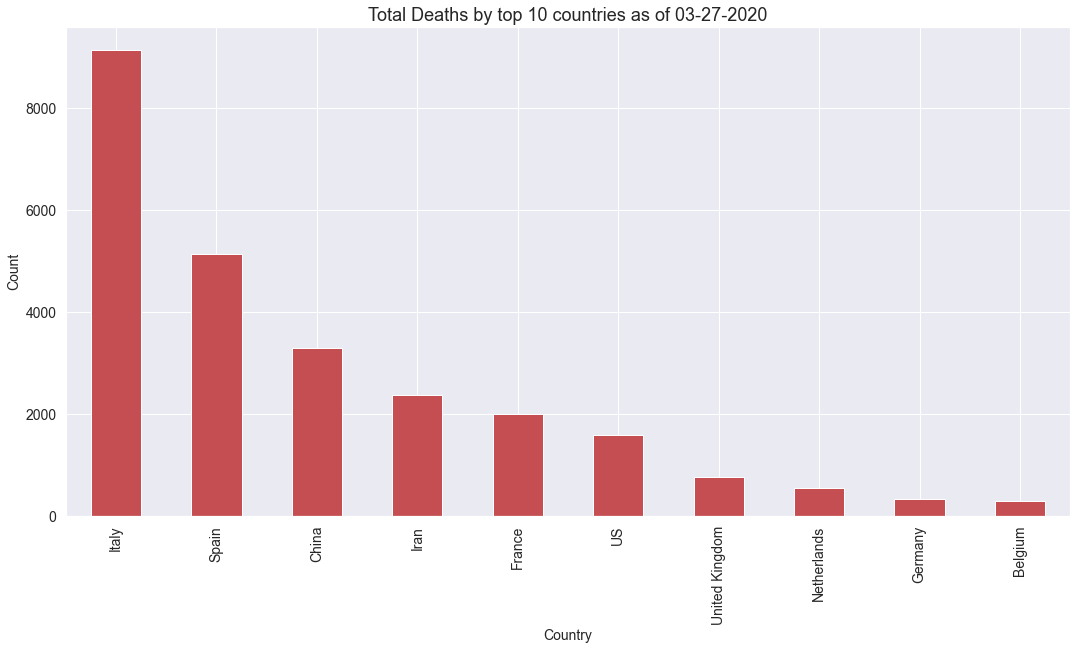

In [3]:
setDefaults()
plotDailyReport(getDailyReport(getYesterday()), color='r', kind='Deaths')

### Graphing time series counts

We can look at how the counts have varied for a county over time if we aggregate by doing a `groupby` on `country`.  We should see an equal number of values per country following this aggregation:  

In [4]:
df = procTimeSeriesConfirmed()
print(f'Found {df.shape} (rows, cols) of cols={df.columns.values}')
ddf = df.groupby('country')['confirmed'].count().sort_values(ascending=True)
print(f'max={ddf.max()}, min={ddf.min()}, count={len(ddf)}')

Found (11616, 2) (rows, cols) of cols=['country' 'confirmed']
max=66, min=66, count=176


Now we can plot a time series of confirmed cases in China, Italy, US and UK as follows:

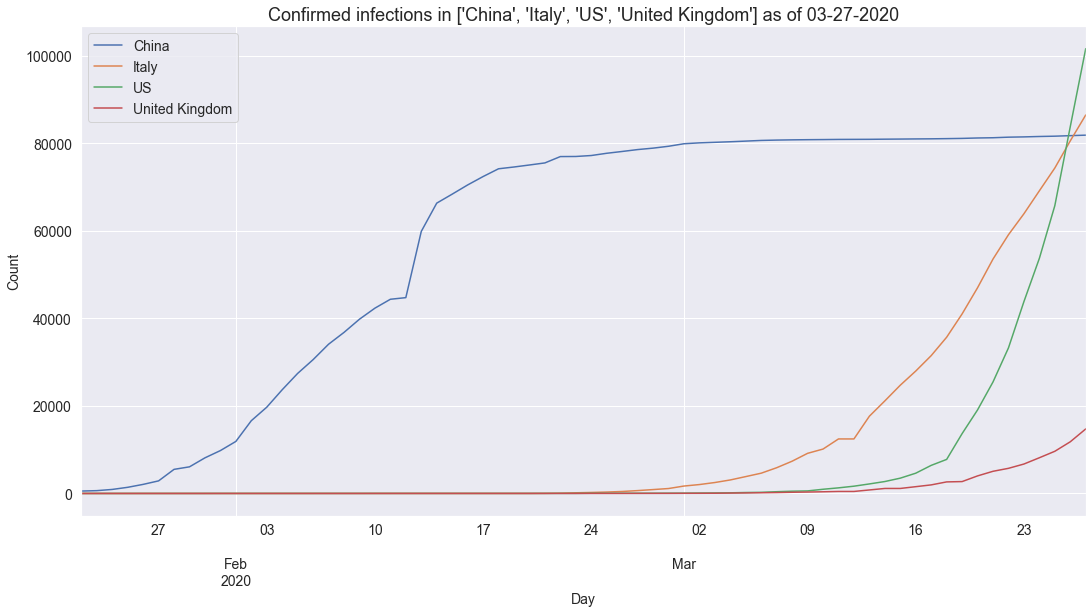

In [5]:
plotCountryTimeSeries(df,['China','Italy','US','United Kingdom'],'Confirmed infections')

And we can plot a time series of recorded deaths in these same countries as follows:

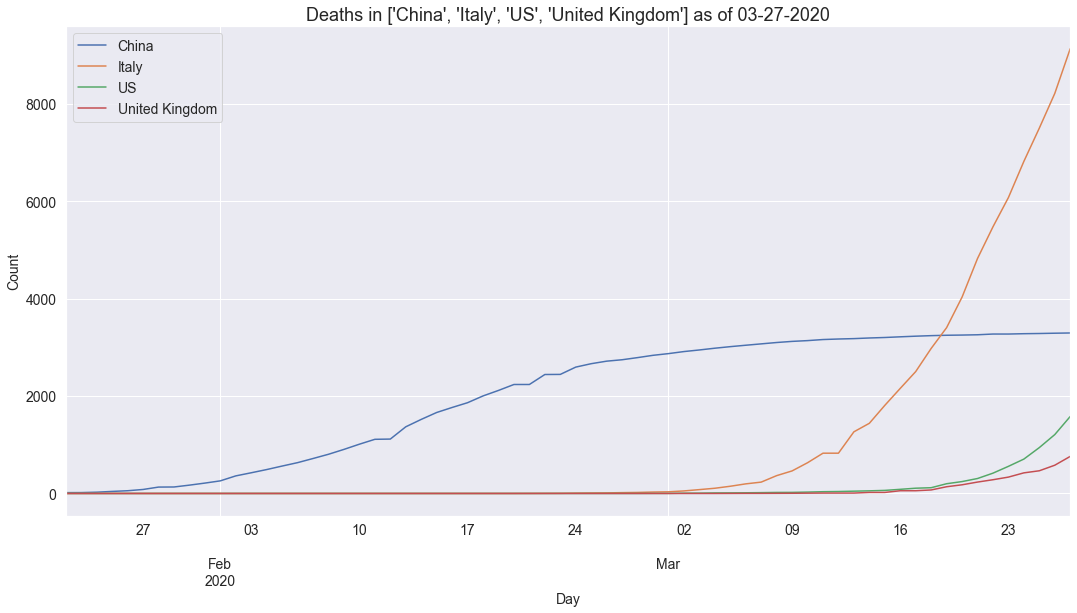

In [6]:
plotCountryTimeSeries(procTimeSeriesDeaths(),['China','Italy','US','United Kingdom'],'Deaths')

### Graphing counts using Covid API

[This site](https://covid19api.com/) details an API that nicely wraps up the same JHU dataset and presents it as `json` via a REST API which allows us to go from API call to formatted graph showing cases and deaths by country as follows:

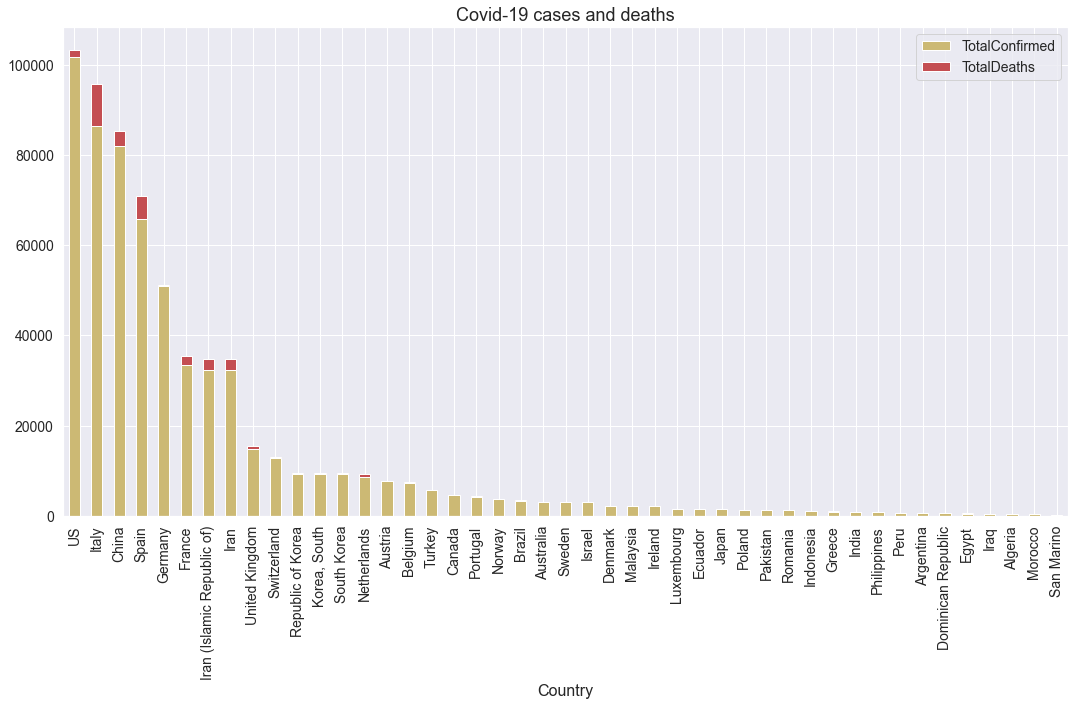

In [7]:
import requests, pandas as pd
df = pd.DataFrame(requests.get('https://api.covid19api.com/summary').json().get('Countries')).\
  sort_values(by=['TotalConfirmed'],ascending=False)
_ = df[df.TotalDeaths > 10].plot(kind='bar',x='Country',y=['TotalConfirmed','TotalDeaths'],\
  color='yr',stacked=True,figsize=(18,9)).set_title('Covid-19 cases and deaths',size=18)

Note that not all the country names are fully normalised.

It's also possible to do timeseries representation using this API by country:

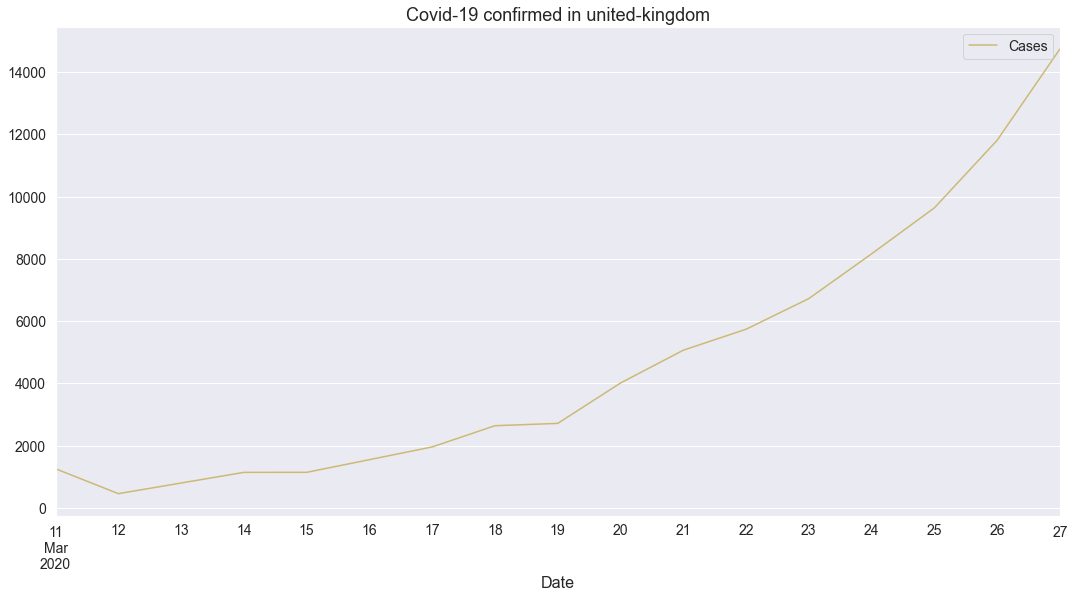

In [8]:
def plotCategoryByCountry(category, country, color='y'):
    url = f'https://api.covid19api.com/total/country/{country}/status/{category}'
    df = pd.DataFrame(requests.get(url).json())
    df['Date'] = df['Date'].apply(pd.to_datetime)
    df.plot(kind='line', x='Date', y='Cases', color=color, figsize=(18,9)).\
      set_title(f'Covid-19 {category} in {country}', size=18)

plotCategoryByCountry('confirmed', 'united-kingdom')

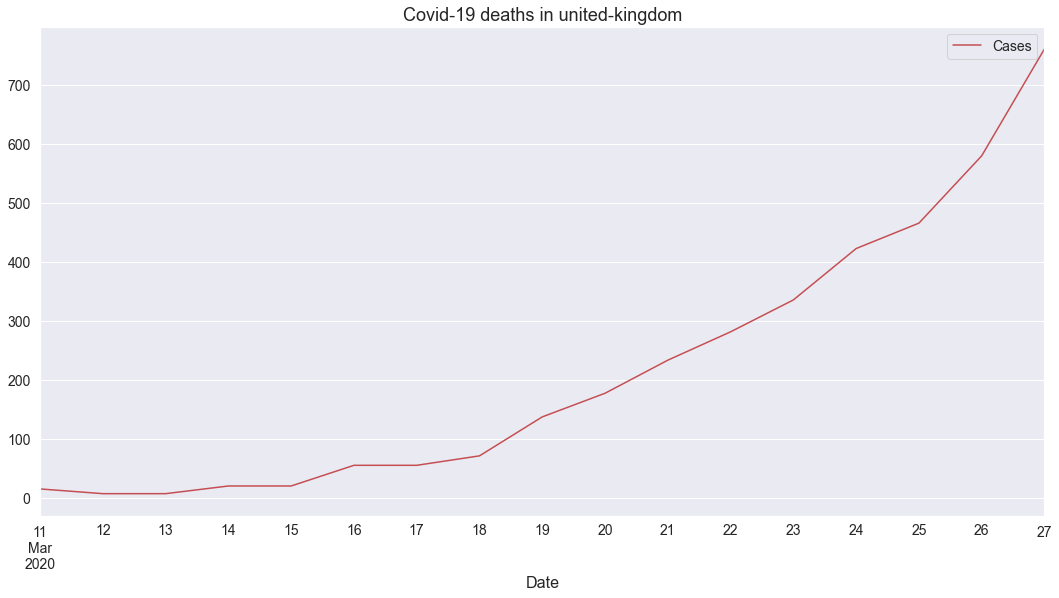

In [9]:
plotCategoryByCountry('deaths', 'united-kingdom', color='r')